# Fake News Detector

## Installing Necessary Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Loading the data

In [8]:
data_fake = pd.read_csv("/content/Fake.csv")

In [9]:
data_true = pd.read_csv("/content/True.csv")

### Data Preview

In [10]:
data_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [11]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


## cleaning

In [12]:
data_fake.info()
data_fake.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,0
title,0
text,0
subject,0
date,0


In [13]:
data_true.info()
data_true.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,0
title,0
text,0
subject,0
date,0


## Adding class column to identify fake or true news

In [14]:
data_fake["class"]=0
data_true['class']=1

In [15]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [16]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)



In [17]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [18]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-18-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-18-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [19]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [20]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [21]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### checking merge data

In [22]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [23]:
data_merge.shape

(44878, 5)

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [24]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [25]:
#count of missing values
data.isnull().sum()

,0
text,0
class,0


#### Randomly shuffling the dataframe

In [26]:
data = data.sample(frac = 1)

In [27]:
data.head()

,text,class
703,Rep. Steve King (R-Iowa) is the most insane if...,0
17822,"Lithonia, Georgia mom Octavia Parks was left d...",0
5798,WASHINGTON/TOKYO (Reuters) - President Donald ...,1
3433,NEW YORK (Reuters) - Massachusetts Institute ...,1
10256,HAVANA (Reuters) - U.S. President Barack Obama...,1


In [28]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [29]:
data.columns

Index(['text', 'class'], dtype='object')

## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [30]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [31]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [32]:
x = data['text']
y = data['class']

## Training the model

#### Splitting the dataset into training set and testing set.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [37]:
pred_lr = LR.predict(xv_test)

In [38]:
LR.score(xv_test, y_test)

0.9873440285204991

In [39]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5797
           1       0.98      0.99      0.99      5423

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### TRAINING ACCCURACY

In [63]:
train_accuracy = LR.score(xv_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9909976825717511


## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

0.9964349376114082

In [43]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5797
           1       0.98      0.99      0.99      5423

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [64]:
# ITS TRANING ACCURACY

DT_train_accuracy = DT.score(xv_train, y_train)
print("Decision Tree Training Accuracy:", DT_train_accuracy)

Decision Tree Training Accuracy: 1.0


## Gradient Boost Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
pred_gb = GB.predict(xv_test)

In [46]:
GB.score(xv_test, y_test)

0.9952762923351158

In [47]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5797
           1       0.99      1.00      1.00      5423

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [65]:
# Its Training accuracy
GB_train_accuracy = GB.score(xv_train, y_train)
print("Gradient Boosting Training Accuracy:", GB_train_accuracy)

Gradient Boosting Training Accuracy: 0.9968209638124665


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
pred_rf = RF.predict(xv_test)

In [50]:
RF.score(xv_test, y_test)

0.9898395721925134

In [51]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5797
           1       0.99      0.99      0.99      5423

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Testing the Model

In [52]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

# Model Testing With Manual Entry

In [69]:
news = str(input())
manual_testing(news)

JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats

In [67]:
news=str(input())
manual_testing(news)

JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats

## comparison of accuracies

<ipython-input-55-5869f0ce1b3c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='viridis')


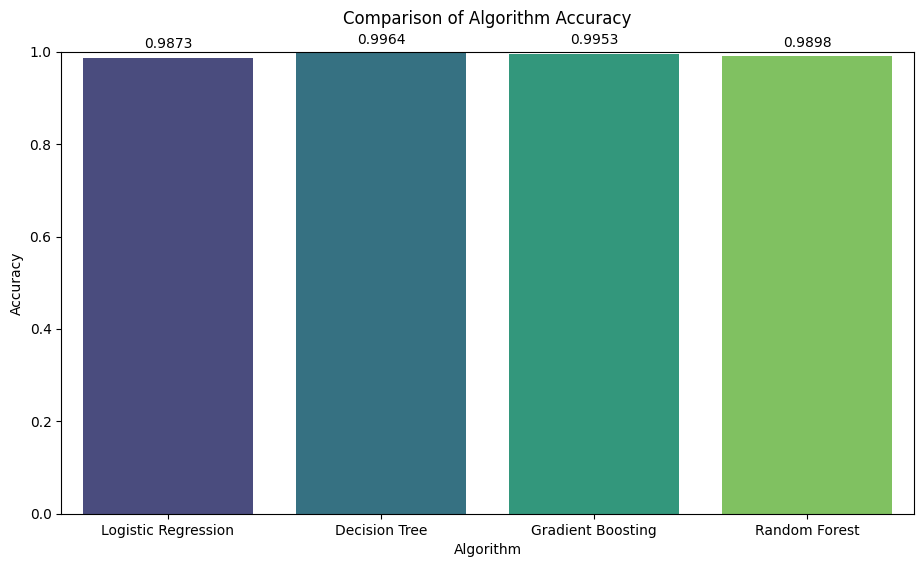

In [55]:
lr_accuracy = LR.score(xv_test, y_test)
dt_accuracy = DT.score(xv_test, y_test)
gb_accuracy = GB.score(xv_test, y_test)
rf_accuracy = RF.score(xv_test, y_test)

accuracy_scores = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Gradient Boosting': gb_accuracy,
    'Random Forest': rf_accuracy
}

accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])
plt.figure(figsize=(11, 6))
ax = sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Algorithm Accuracy', pad=20)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## plotting confusion matrix

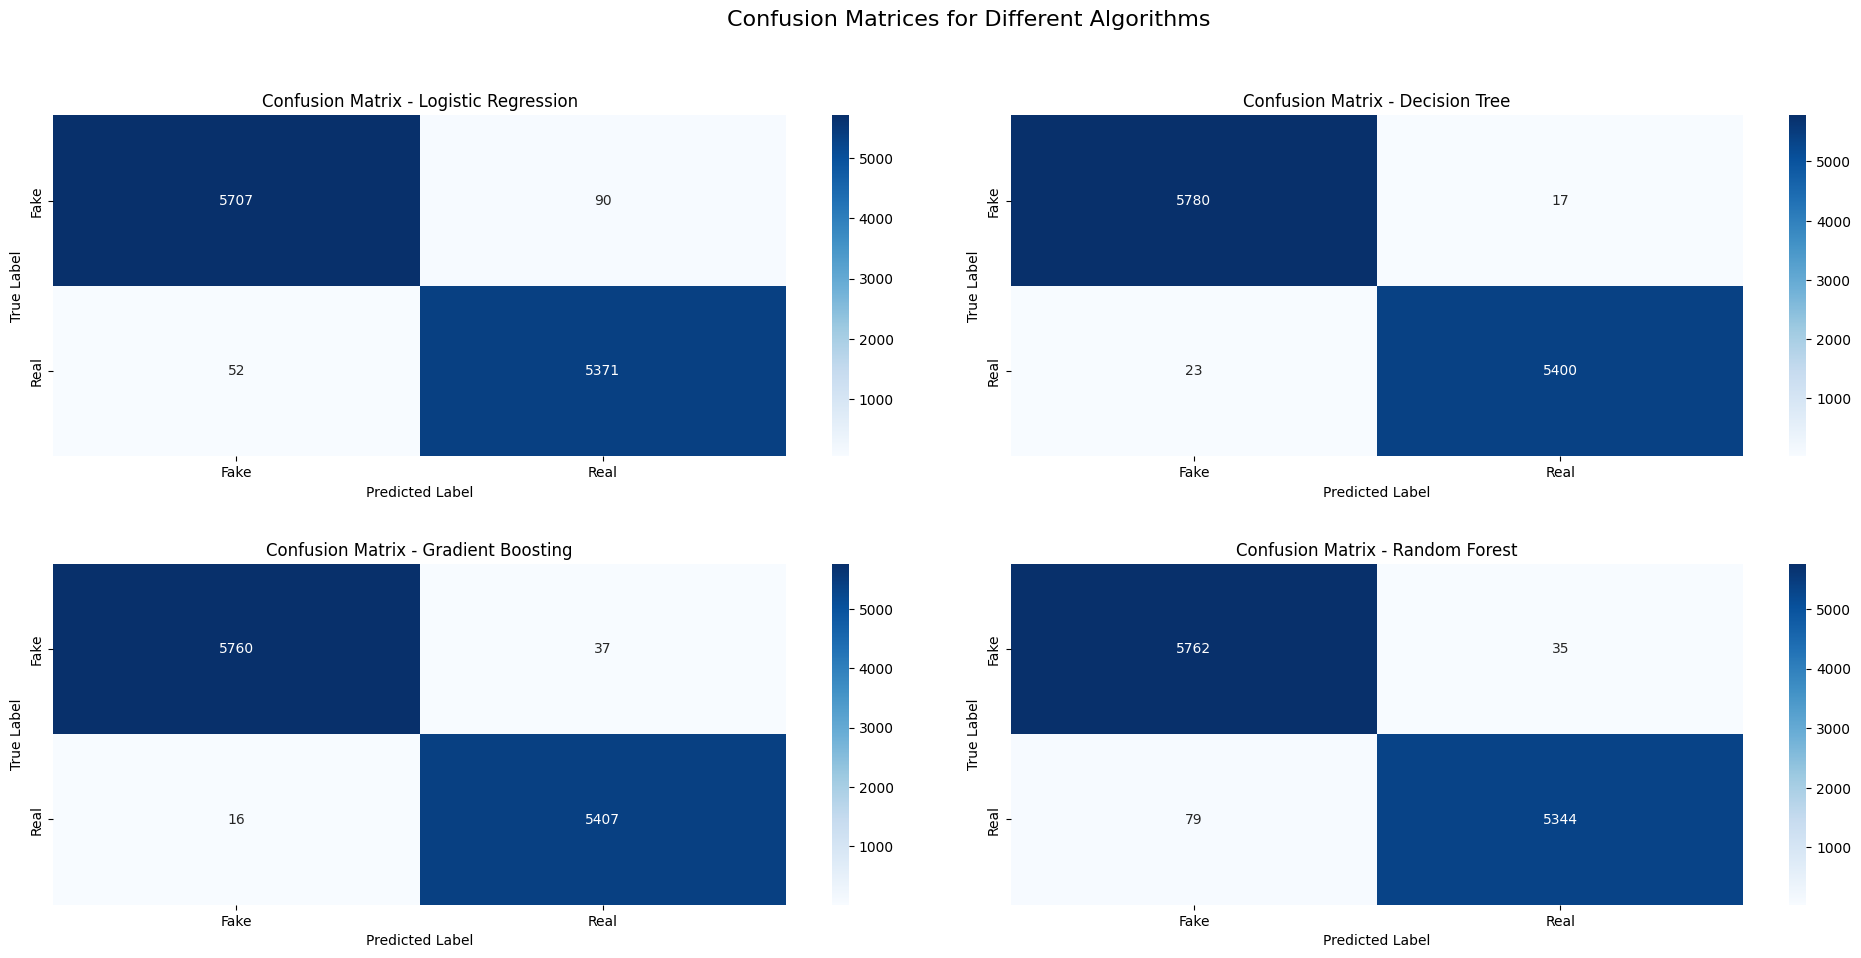

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': (y_test, pred_lr),
    'Decision Tree': (y_test, pred_dt),
    'Gradient Boosting': (y_test, pred_gb),
    'Random Forest': (y_test, pred_rf)
}

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Confusion Matrices for Different Algorithms', fontsize=16)
axes = axes.flatten()  # Flatten the 2D array of axes

for i, (model_name, (y_true, y_pred)) in enumerate(models.items()):
    cm = confusion_matrix(y_true, y_pred)
    ax = axes[i]  # Select the current subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout(pad=3.0)
plt.show()

##### Based on the resulting accuracy scores visualized in the bar plot and confusion matrices, the **Gradient Boosting Classifier** appears to be the best-performing algorithm in this scenario.  While the code doesn't explicitly state which metric is the most important (accuracy, precision, recall, F1-score), the bar plot visually indicates the highest accuracy for the Gradient Boosting model.  Further investigation into the confusion matrix for Gradient Boosting would provide a more comprehensive picture, revealing the trade-off between true positive/negative and false positive/negative rates.  However, based solely on the available accuracy scores, Gradient Boosting is the top contender.


# classification matrix of all applied algorithms

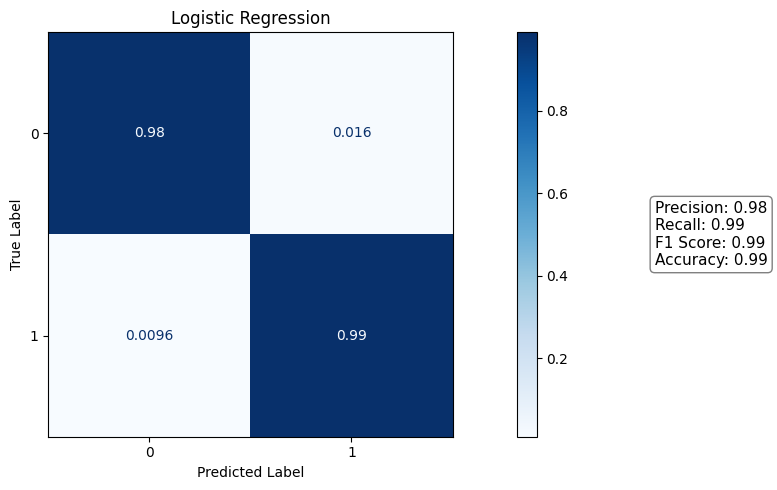

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression metrics and plot
fig, ax = plt.subplots(figsize=(14, 5))
disp = ConfusionMatrixDisplay.from_estimator(LR, xv_test, y_test, cmap='Blues', ax=ax, normalize='true')

# Metrics
precision = precision_score(y_test, pred_lr, average='binary')
recall = recall_score(y_test, pred_lr, average='binary')
f1 = f1_score(y_test, pred_lr, average='binary')
accuracy = accuracy_score(y_test, pred_lr)

ax.set_title("Logistic Regression")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Add metrics box
textstr = f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}"
ax.text(1.5, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle="round", facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()


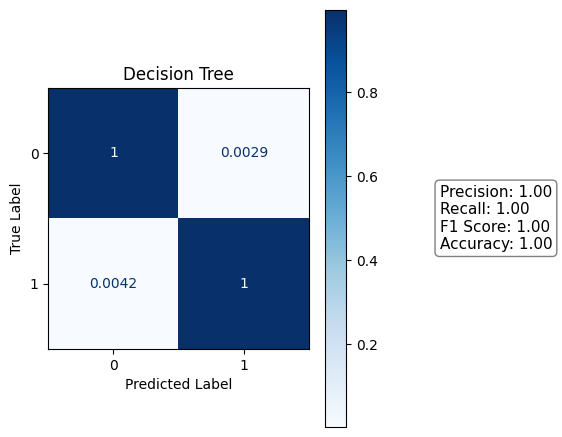

In [58]:
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay.from_estimator(DT, xv_test, y_test, cmap='Blues', ax=ax, normalize='true')

precision = precision_score(y_test, pred_dt, average='binary')
recall = recall_score(y_test, pred_dt, average='binary')
f1 = f1_score(y_test, pred_dt, average='binary')
accuracy = accuracy_score(y_test, pred_dt)

ax.set_title("Decision Tree")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

textstr = f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}"
ax.text(1.5, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle="round", facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()


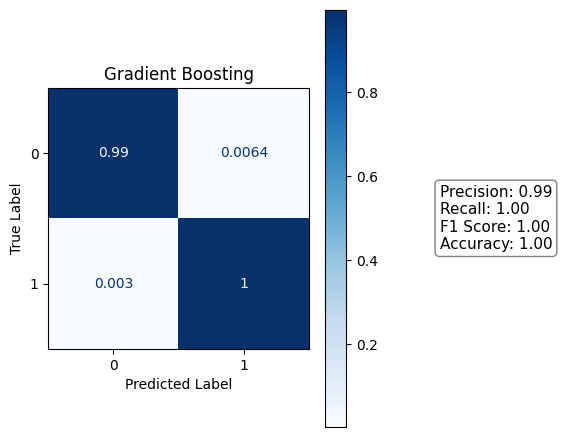

In [59]:
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay.from_estimator(GB, xv_test, y_test, cmap='Blues', ax=ax, normalize='true')

precision = precision_score(y_test, pred_gb, average='binary')
recall = recall_score(y_test, pred_gb, average='binary')
f1 = f1_score(y_test, pred_gb, average='binary')
accuracy = accuracy_score(y_test, pred_gb)

ax.set_title("Gradient Boosting")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

textstr = f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}"
ax.text(1.5, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle="round", facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()


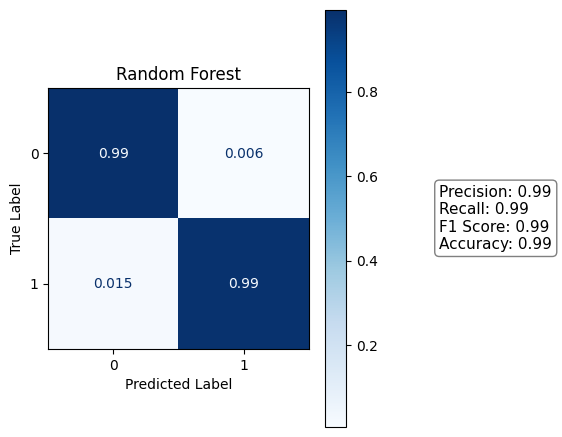

In [60]:
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay.from_estimator(RF, xv_test, y_test, cmap='Blues', ax=ax, normalize='true')

precision = precision_score(y_test, pred_rf, average='binary')
recall = recall_score(y_test, pred_rf, average='binary')
f1 = f1_score(y_test, pred_rf, average='binary')
accuracy = accuracy_score(y_test, pred_rf)

ax.set_title("Random Forest")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

textstr = f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}"
ax.text(1.5, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle="round", facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.show()


In [61]:
# prompt: save this whole code in a pickel file so that i can used it in another notebook

#import pickle

#objects_to_save = {
#    'LR_model': LR,
#    'DT_model': DT,
#    'GB_model': GB,
#    'RF_model': RF,
#    'tfidf_vectorizer': vectorization
#}

# Define the filename for the pickle file
#filename = 'fake_news_models.pkl'

# Open the file in binary write mode ('wb')
#with open(filename, 'wb') as f:
    # Use pickle.dump to save the dictionary to the file
#    pickle.dump(objects_to_save, f)

#print(f"Objects saved successfully to {filename}")


Objects saved successfully to fake_news_models.pkl
